In [1]:
#Функциф получения ссылки на изображение 
#i - номер кадра
#num - номер видео
def get_link(i,num):
    if i<10:
        link='00000'+str(i)
    elif i<100:
        link='0000'+str(i)
    elif i<1000:
        link='000'+str(i)
    else:
        link='00'+str(i)
    s='Lab_6/video'+str(num)+'/in'+link+'.jpg'
    return s

In [2]:
#Mean filter обработки изображения
import cv2
import numpy as np
def MeanFilter(lab,Th):
    #Создаем фон
    img=cv2.imread(get_link(1,lab))
    output=np.zeros(img.shape)
    N=999
    for i in range(N):
        img=cv2.imread(get_link(i+1,lab))
        output+=(img/N)
        
    output=np.ceil(output)
    B=np.array(output,dtype=np.uint8)
    
    #Вычисляем маску
    I=cv2.imread(get_link(1001,lab))
    mask=np.zeros(img.shape)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if(abs(int(I[i,j,0])-int(B[i,j,0]))<Th and abs(int(I[i,j,1])-int(B[i,j,1]))<Th and abs(int(I[i,j,2])-int(B[i,j,2]))<Th):
                mask[i,j]=0
            else:
                mask[i,j]=255
            
    mask=np.array(mask,dtype=np.uint8)
    return mask

In [3]:
#Mean filter with refreshing background
import cv2
import numpy as np
def MeanFilter_refresh(lab,Th,alpha):
    #Создаем фон
    img=cv2.imread(get_link(1,lab))
    output=np.zeros(img.shape)
    N=999
    for i in range(N):
        img=cv2.imread(get_link(i+1,lab))
        output+=(img/N)
        
    output=np.ceil(output)
    B=np.array(output,dtype=np.uint8)
    I=cv2.imread(get_link(1001,lab))
    
    #Refreshing
    B_ref=(1-alpha)*B+alpha*I
    mask=np.zeros(img.shape)
    
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if(abs(int(I[i,j,0])-int(B_ref[i,j,0]))<Th and abs(int(I[i,j,1])-int(B_ref[i,j,1]))<Th and abs(int(I[i,j,2])-int(B_ref[i,j,2]))<Th):
                mask[i,j]=0
            else:
                mask[i,j]=255
            
    mask=np.array(mask,dtype=np.uint8)
    return mask

In [4]:
#Mean filter для 1 видео
import cv2
import numpy as np

lab=1
mask=MeanFilter(lab,40)
I=cv2.imread(get_link(1001,lab))
#Обводим двигающийся объект
edge=cv2.Canny(mask,127,255)
for i in range(I.shape[0]):
    for j in range(I.shape[1]):
        if edge[i,j]>100:
            I[i,j,0]=0
            I[i,j,1]=255
            I[i,j,2]=0
            
cv2.imshow('Mask', mask)
cv2.waitKey(0)
cv2.destroyAllWindows()            
cv2.imshow('Image', I)
cv2.waitKey(0)
cv2.destroyAllWindows()

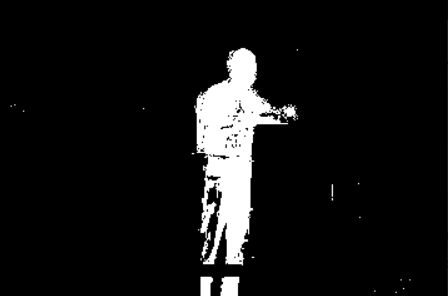
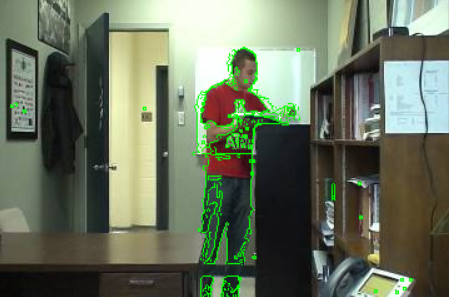

In [5]:
#Mean filter with refreshing background для 1 видео
import cv2
import numpy as np

lab=1
mask=MeanFilter_refresh(lab,40,0.1)
I=cv2.imread(get_link(1001,lab))

#Обводим двигающийся объект
edge=cv2.Canny(mask,127,255)
for i in range(I.shape[0]):
    for j in range(I.shape[1]):
        if edge[i,j]>100:
            I[i,j,0]=0
            I[i,j,1]=255
            I[i,j,2]=0
            
cv2.imshow('Mask', mask)
cv2.waitKey(0)
cv2.destroyAllWindows()            
cv2.imshow('Image', I)
cv2.waitKey(0)
cv2.destroyAllWindows()

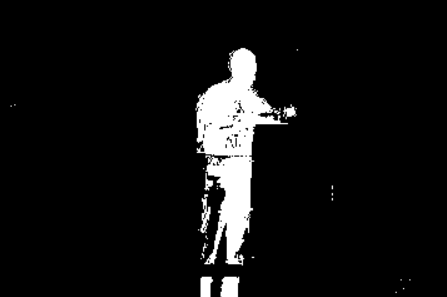
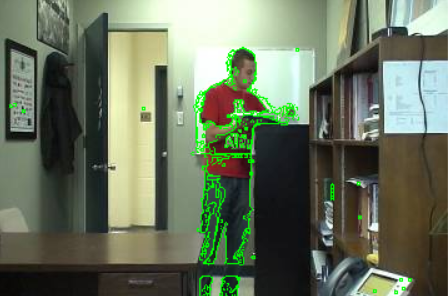

In [6]:
#Mean filter для 2 видео
import cv2
import numpy as np

lab=2
mask=MeanFilter(lab,40)
I=cv2.imread(get_link(1001,lab))

#Обводим двигающийся объект
edge=cv2.Canny(mask,127,255)
for i in range(I.shape[0]):
    for j in range(I.shape[1]):
        if edge[i,j]>100:
            I[i,j,0]=0
            I[i,j,1]=255
            I[i,j,2]=0
            
cv2.imshow('Mask', mask)
cv2.waitKey(0)
cv2.destroyAllWindows()            
cv2.imshow('Image', I)
cv2.waitKey(0)
cv2.destroyAllWindows()

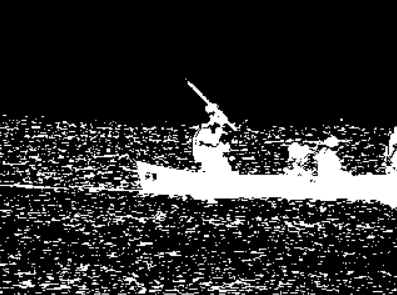
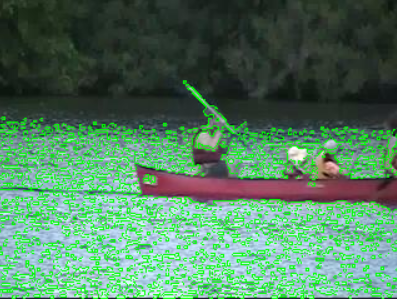

In [7]:
#Mean filter with refreshing background для 2 видео
import cv2
import numpy as np

lab=2
mask=MeanFilter_refresh(lab,40,0.1)
I=cv2.imread(get_link(1001,lab))

#Обводим двигающийся объект
edge=cv2.Canny(mask,127,255)
for i in range(I.shape[0]):
    for j in range(I.shape[1]):
        if edge[i,j]>100:
            I[i,j,0]=0
            I[i,j,1]=255
            I[i,j,2]=0
            
cv2.imshow('Mask', mask)
cv2.waitKey(0)
cv2.destroyAllWindows()            
cv2.imshow('Image', I)
cv2.waitKey(0)
cv2.destroyAllWindows()

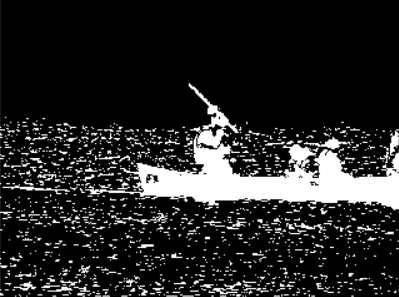
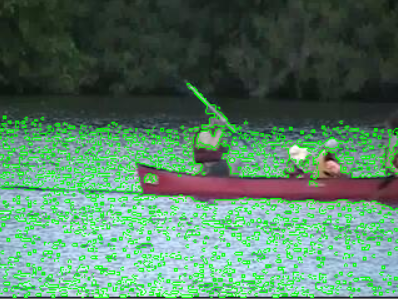

In [8]:
#GMM
def get_fgmask(num):
    frames = []
    for i in range(1,1002):
        frames.append(cv2.cvtColor(cv2.imread(get_link(i,num)),cv2.COLOR_BGR2GRAY))
    fgbg = cv2.createBackgroundSubtractorMOG2()
    fgmask = []
    for frame in frames:
        fgmask.append(fgbg.apply(frame))
    return fgmask

In [11]:
#GMM for 1 video
fgmask = get_fgmask(1)
cv2.imshow('frame', fgmask[1000])
cv2.waitKey(0)
cv2.destroyAllWindows()

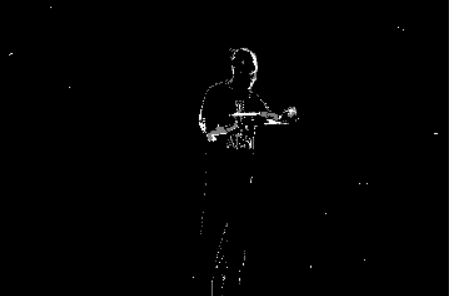

In [12]:
#GMM for 2 video
fgmask = get_fgmask(2)
cv2.imshow('frame', fgmask[1000])
cv2.waitKey(0)
cv2.destroyAllWindows()

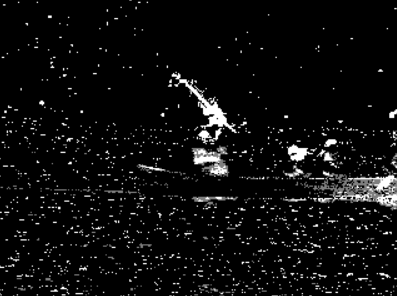